In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.drop(['Time','Amount'], axis=1, inplace = True)

Уберем из таблицы повторяющиеся строки, так как они дают искаженную картину, например, при подсчете числа соседей:

In [5]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

In [6]:
data.shape

(275663, 29)

Удалим целевую переменную и создадим вектор значений целевой переменной:

In [7]:
df = data.drop(['Class'], axis=1)
Class = data['Class']

In [8]:
classes = np.array(data['Class'])

Посмотрим, как распределены значения переменной Class в процентном соотношении:

In [9]:
class_persentage = Class.value_counts(normalize=True)

In [10]:
anom_pers = class_persentage[1]
anom_pers

0.0017158632097887638

... и в "натуральном выражении":

In [11]:
Class.value_counts()

0    275190
1       473
Name: Class, dtype: int64

Видим, что по экспертной оценке мошеннические действия составляют менее $0.2\%$ от всех случаев. Это наводит на мысль о неэффективности попыток "визуального" поиска анамалий или анализа данных с помощью грубых статистик.

Посмотрим на базовые статистики для df:

In [12]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.000511,0.003407,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.820520,0.779950,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.464409,-0.212027,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,0.001119,-0.058053,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.465782,0.139803,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


и гистограммы для каждого параметра:

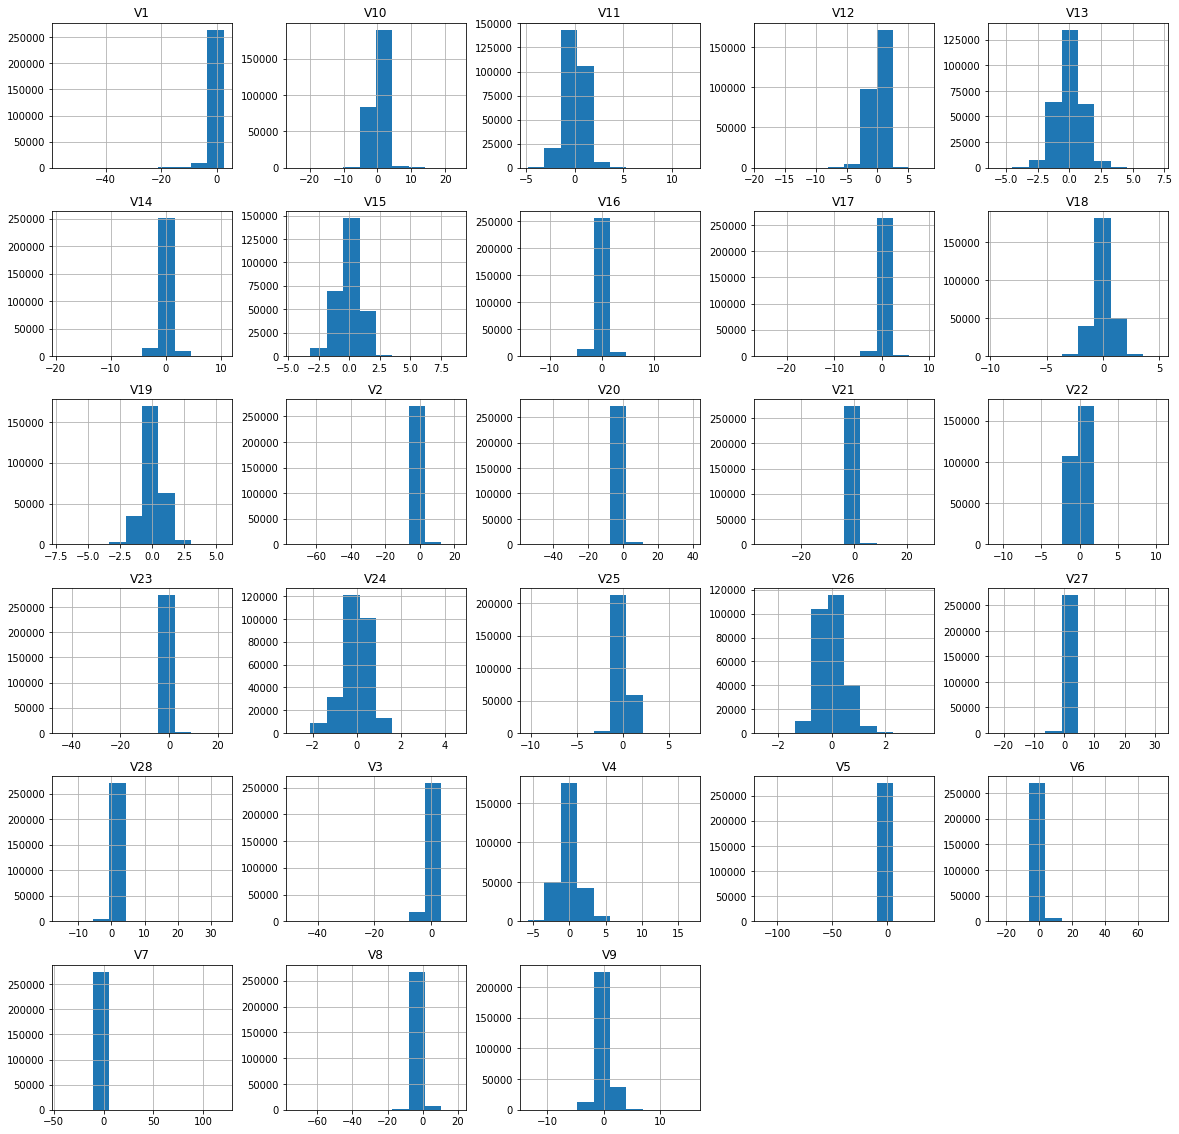

In [13]:
df.hist(figsize=(20, 20));

Видим, что все признаки сосредоточены вблизи нуля, и возникает желание считать аномальными значения,
сильно удаленные от среднего значения. 

Создадим датафрейм с отшкалированными признаками:

In [14]:
from sklearn.preprocessing import RobustScaler
df_scaled = pd.DataFrame(data = RobustScaler().fit_transform(df))

Посмотрим на плоскую визуализацию датафрейма:

In [15]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(perplexity = 50, n_jobs = -1)
tsne_transformed = tsne.fit_transform(df_scaled)

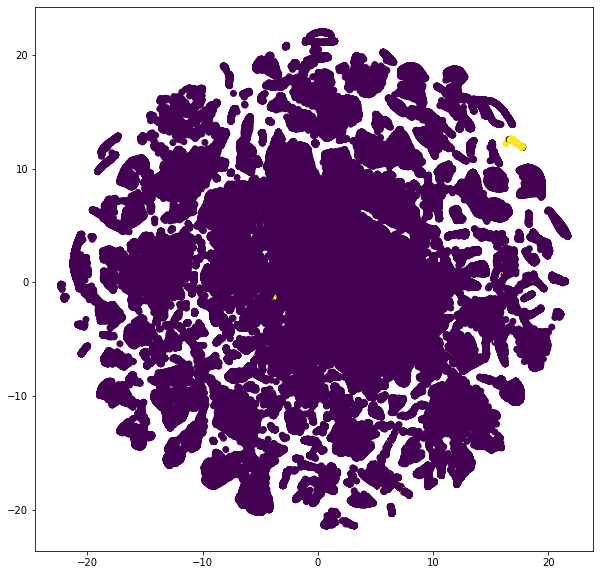

In [16]:
plt.figure(figsize = (10, 10))
plt.scatter(tsne_transformed[:, 0], tsne_transformed[:, 1], c = classes);

Если судить по желтой точке в середине картинки, то можно предположить, что некоторые наблюдения, которые объявлены как мошенничество, по своим признакам слабо отличимы от обычных.

## Поиск аномалий.

Применим метод поиска аномалий на основании расстояний до средних значений:

In [32]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

In [33]:
class DistanceOutliers(BaseEstimator):
    """
    Distance based outlier detector model
    
    Fit method calculates centroid of training samples and
    using `metric` get distances from centroid to train samples.
    Having distances - we calculate `threshold` based on `percentile`.
    
    Predict method uses `threshold` and `metric` to determine, whether
    distance to sample from centroid is too large -> outlier.
    
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [34]:
DO = DistanceOutliers(metric = 'cityblock', percentile = class_persentage[0] * 100)
DO.fit(df_scaled)
DO_outliers = DO.predict(df_scaled)

In [35]:
outliers_DO = (DO_outliers == 1).nonzero()

In [36]:
np.size(outliers_DO)

473

 Посмотрим, сколько из обнаруженных "выбросов" являются "мошенниками" (fraud):

In [37]:
outliers_DO_true = np.asarray(np.logical_and(DO_outliers == 1, classes == 1)).nonzero()

In [38]:
np.size(outliers_DO_true)

99

Применим теперь для поиска аномалий "Изолирующий лес":

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
isolation_forest = IsolationForest(n_estimators = 250, contamination = anom_pers, 
    max_features = 1.0, bootstrap = True, behaviour = "new", random_state = 42, verbose = 1, n_jobs = -1)

In [41]:
isolation_forest.fit(df)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   22.7s remaining:   22.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   22.9s finished


IsolationForest(behaviour='new', bootstrap=True,
                contamination=0.0017158632097887638, max_features=1.0,
                max_samples='auto', n_estimators=250, n_jobs=-1,
                random_state=42, verbose=1, warm_start=False)

In [42]:
IF_outliers = isolation_forest.predict(df)

In [43]:
outliers_IF = (IF_outliers==-1).nonzero()

In [44]:
np.size(outliers_IF)

473

 Посмотрим, сколько из обнаруженных "выбросов" являются "мошенниками":

In [45]:
outliers_IF_true = np.asarray(np.logical_and(IF_outliers ==-1, classes == 1)).nonzero()

In [46]:
np.size(outliers_IF_true)

136

Отметим, что множество outliers_DO_true является собственным подмножеством  outliers_IF_true 
(поэтому ниже мы его рассматривать не будем):

In [47]:
np.size(np.intersect1d(outliers_DO_true, outliers_IF_true))

99

Применим еще один метод поиска аномалий - одноклассовую машину опорных векторов:

In [17]:
from sklearn.svm import OneClassSVM

In [18]:
one_class_svm = OneClassSVM(nu = anom_pers, gamma = 'auto', random_state=42, verbose = 1)
one_class_svm.fit(df_scaled)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/svm/classes.py:1194: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


[LibSVM]

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.0017158632097887638, random_state=42,
            shrinking=True, tol=0.001, verbose=1)

In [19]:
SVM_outliers = one_class_svm.predict(df_scaled)

In [20]:
outliers_SVM = (SVM_outliers==-1).nonzero()

Метод OneClassSVM обнаружил много аномалий:

In [21]:
np.size(outliers_SVM)

2629

Однако среди аномалий мошенников оказалось  меньше, чем по методу IsolationForest:

In [22]:
outliers_SVM_true = np.asarray(np.logical_and(SVM_outliers ==-1, classes == 1)).nonzero()

In [23]:
np.size(outliers_SVM_true)

131

Теперь испробуем другой подход - рассмотрим ситуацию с точки зрения поиска новизны.
Для этого применим метод локального фактора выбросов (LOF)

In [24]:
from sklearn.neighbors import LocalOutlierFactor

Разобьем наблюдения на два множества - случаи, которые эксперты отнесли к мошенническим и остальные:

In [25]:
Fraud = data[data['Class'] == 1].drop(['Class'], axis=1)
Valid = data[data['Class'] == 0].drop(['Class'], axis=1)

Будем искать новизну в "мошеннических" случаях по сравнению с "обычными":

In [26]:
lof = LocalOutlierFactor(metric = 'cityblock', novelty = True, n_jobs = -1)
lof.fit(Valid)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


LocalOutlierFactor(algorithm='auto', contamination='legacy', leaf_size=30,
                   metric='cityblock', metric_params=None, n_jobs=-1,
                   n_neighbors=20, novelty=True, p=2)

In [27]:
LOF_outliers = lof.predict(Fraud)

In [28]:
df_LOF_outliers = pd.DataFrame(columns = ['Fraud'], data = LOF_outliers, index = Fraud.index)

In [29]:
outliers_LOF = np.asarray(df_LOF_outliers[df_LOF_outliers['Fraud'] == -1].index)

In [30]:
np.size(outliers_LOF)

133

Исследуем теперь пересечения и объединения множеств outliers_SVM_true, outliers_IF_true и outliers_LOF:

In [48]:
fraud_SVM_and_IF = np.intersect1d(outliers_SVM_true, outliers_IF_true)
np.size(fraud_SVM_and_IF)

62

In [49]:
fraud_SVM_and_LOF = np.intersect1d(outliers_SVM_true, outliers_LOF)
np.size(fraud_SVM_and_LOF)

34

In [50]:
fraud_IF_and_LOF = np.intersect1d(outliers_IF_true, outliers_LOF)
np.size(fraud_IF_and_LOF)

28

In [51]:
fraud_SVM_and_IF_and_LOF = np.intersect1d(fraud_SVM_and_IF, outliers_LOF)

In [52]:
fraud_min = np.size(fraud_SVM_and_IF_and_LOF)
fraud_min

10

In [53]:
fraud_min / 473 * 100

2.1141649048625792

In [54]:
fraud_SVM_or_IF = np.union1d(outliers_SVM_true, outliers_IF_true)
np.size(fraud_SVM_or_IF)

205

In [55]:
fraud_SVM_or_LOF = np.union1d(outliers_SVM_true, outliers_LOF)
np.size(fraud_SVM_or_LOF)

230

In [56]:
fraud_IF_or_LOF = np.union1d(outliers_IF_true, outliers_LOF)
np.size(fraud_IF_or_LOF)

241

In [57]:
fraud_SVM_or_IF_or_LOF = np.union1d(fraud_SVM_or_IF, outliers_LOF)

In [58]:
fraud_max = np.size(fraud_SVM_or_IF_or_LOF)
fraud_max

286

In [59]:
fraud_max / 437 * 100

65.44622425629291

### Выводы: 
- $2\%$ мошеннических транзакций определены всеми выбранными методами как аномальные,
- $65\%$ мошеннических транзакций определены хотя бы одним из выбранных методов как аномальные.

Похоже, что либо нужно применить еще какой-нибудь метод поиска аномалий, существенно отличающийся от использованных (например, перейти к анализу спектра данных), либо в приведенном для анализа датасете при применении PCA потеряны существенные свойства аномальных наблюдений.